
# Lab | Handling Data Imbalance in Classification Models

For this lab and in the next lessons we will build a model on customer churn binary classification problem. You will be using `files_for_lab/Customer-Churn.csv` file.

### Scenario

You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

### Instructions

In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

- Import the required libraries and modules that you would need.
- Read that data into Python and call the dataframe `churnData`.
- Check the datatypes of all the columns in the data. You would see that the column `TotalCharges` is object type. Convert this column into numeric type using `pd.to_numeric` function.
- Check for null values in the dataframe. Replace the null values.
- Use the following features: `tenure`, `SeniorCitizen`, `MonthlyCharges` and `TotalCharges`:
  - Scale the features either by using normalizer or a standard scaler.
  - Split the data into a training set and a test set.
  - Fit a logistic regression model on the training data.
  - Check the accuracy on the test data.

**Note**: So far we have not balanced the data.

Managing imbalance in the dataset

- Check for the imbalance.
- Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
- Each time fit the model and see how the accuracy of the model is.






## 1. Import the required libraries and modules that you would need.

### Loading libraries

In [235]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.datasets import load_boston
import seaborn as sns
import matplotlib.pyplot as plt

In [236]:
churnData=pd.read_csv("Customer-Churn.csv")
churnData.columns=map(str.lower, churnData.columns)
churnData.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [237]:
churnData.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [238]:
churnData.columns=['gender', 'senior citizen', 'partner', 'dependents', 'tenure',
       'phone service', 'online security', 'online backup', 'device protection',
       'tech support', 'streaming tv', 'streaming movies', 'contract',
       'monthly charges', 'total charges', 'churn']
churnData.head()

,gender,senior citizen,partner,dependents,tenure,phone service,online security,online backup,device protection,tech support,streaming tv,streaming movies,contract,monthly charges,total charges,churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


### 2. Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.

In [239]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7043 non-null   object 
 1   senior citizen     7043 non-null   int64  
 2   partner            7043 non-null   object 
 3   dependents         7043 non-null   object 
 4   tenure             7043 non-null   int64  
 5   phone service      7043 non-null   object 
 6   online security    7043 non-null   object 
 7   online backup      7043 non-null   object 
 8   device protection  7043 non-null   object 
 9   tech support       7043 non-null   object 
 10  streaming tv       7043 non-null   object 
 11  streaming movies   7043 non-null   object 
 12  contract           7043 non-null   object 
 13  monthly charges    7043 non-null   float64
 14  total charges      7043 non-null   object 
 15  churn              7043 non-null   object 
dtypes: float64(1), int64(2),

In [240]:
churnData["total charges"]=pd.to_numeric(churnData["total charges"],errors='coerce')

In [241]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7043 non-null   object 
 1   senior citizen     7043 non-null   int64  
 2   partner            7043 non-null   object 
 3   dependents         7043 non-null   object 
 4   tenure             7043 non-null   int64  
 5   phone service      7043 non-null   object 
 6   online security    7043 non-null   object 
 7   online backup      7043 non-null   object 
 8   device protection  7043 non-null   object 
 9   tech support       7043 non-null   object 
 10  streaming tv       7043 non-null   object 
 11  streaming movies   7043 non-null   object 
 12  contract           7043 non-null   object 
 13  monthly charges    7043 non-null   float64
 14  total charges      7032 non-null   float64
 15  churn              7043 non-null   object 
dtypes: float64(2), int64(2),

### 3. Check for null values in the dataframe. Replace the null values.

In [242]:
churnData.replace(" ",np.nan)

,gender,senior citizen,partner,dependents,tenure,phone service,online security,online backup,device protection,tech support,streaming tv,streaming movies,contract,monthly charges,total charges,churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.60,Yes


In [243]:
null_values=pd.DataFrame(churnData.isnull().sum())
null_values.columns=["nber_nulls"]
null_values[null_values["nber_nulls"]>0].head(90)

,nber_nulls
total charges,11


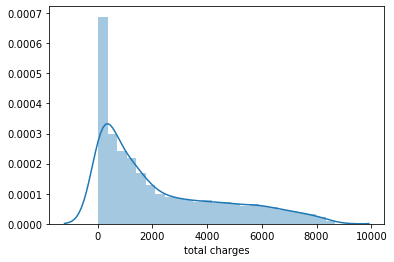

In [244]:
sns.distplot(churnData["total charges"])

In [245]:
churnData["total charges"]=churnData["total charges"].fillna(np.mean(churnData["total charges"]))

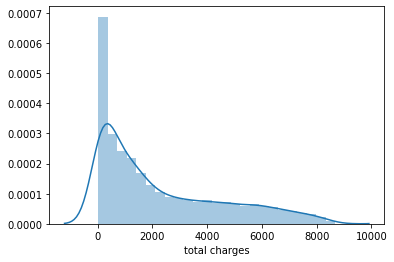

In [246]:
sns.distplot(churnData["total charges"])

### 3. Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
- Scale the features either by using normalizer or a standard scaler.
- Split the data into a training set and a test set.
- Fit a logistic regression model on the training data.
- Check the accuracy on the test data.

In [247]:
churnData.columns

Index(['gender', 'senior citizen', 'partner', 'dependents', 'tenure',
       'phone service', 'online security', 'online backup',
       'device protection', 'tech support', 'streaming tv', 'streaming movies',
       'contract', 'monthly charges', 'total charges', 'churn'],
      dtype='object')

In [248]:
x_num=churnData.select_dtypes(np.number)

In [249]:
x_cat=churnData.select_dtypes(object).drop("churn",axis=1)

In [250]:
y=churnData.churn

#### CATEGORICAL

In [251]:
x_cat=pd.get_dummies(x_cat)
x_cat.head()

,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phone service_No,phone service_Yes,online security_No,online security_No internet service,online security_Yes,online backup_No,online backup_No internet service,online backup_Yes,device protection_No,device protection_No internet service,device protection_Yes,tech support_No,tech support_No internet service,tech support_Yes,streaming tv_No,streaming tv_No internet service,streaming tv_Yes,streaming movies_No,streaming movies_No internet service,streaming movies_Yes,contract_Month-to-month,contract_One year,contract_Two year
0,1,0,0,1,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
1,0,1,1,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0
2,0,1,1,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,0,1,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0
4,1,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


#### NUMERICAL

Distplot:  senior citizen


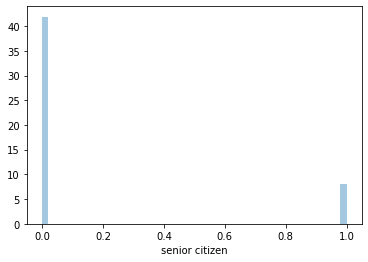

Distplot:  tenure


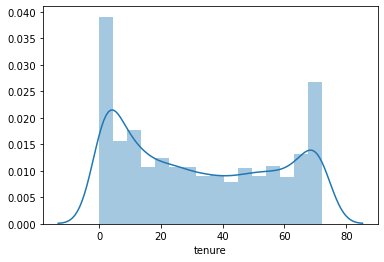

Distplot:  monthly charges


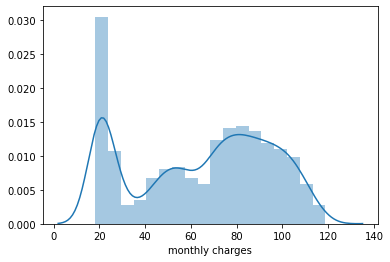

Distplot:  total charges


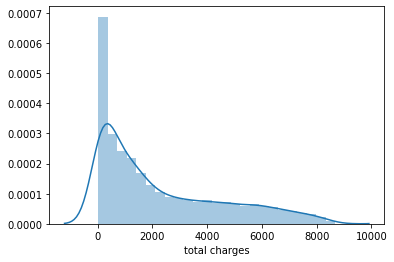

In [252]:
cols = list(x_num)
for col in cols:
    print("Distplot: ",col)
    sns.distplot(x_num[col])
    plt.show()

In [253]:
from sklearn.preprocessing import Normalizer

scaler=Normalizer().fit(x_num)
x_normalised=scaler.transform(x_num)
x_normalised=pd.DataFrame(x_normalised)
x_normalised.columns=x_num.columns
x_normalised.head()

,senior citizen,tenure,monthly charges,total charges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


Distplot:  senior citizen


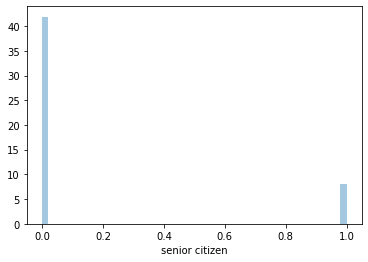

Distplot:  tenure


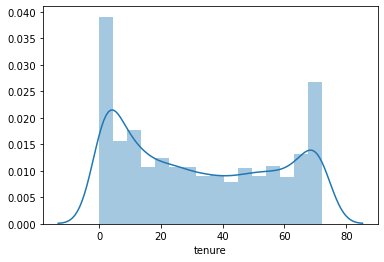

Distplot:  monthly charges


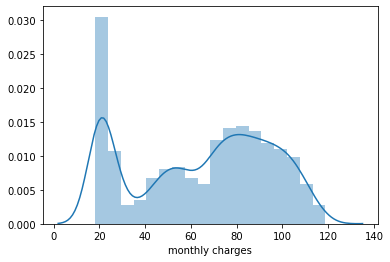

Distplot:  total charges


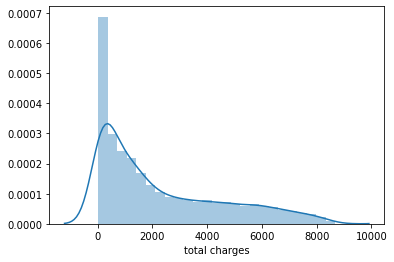

In [254]:
cols = list(x_num)
for col in cols:
    print("Distplot: ",col)
    sns.distplot(x_normalised[col])
    plt.show()

#### DataFrame

In [255]:
X=pd.concat([x_cat,x_normalised],axis=1)
X.head()

,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phone service_No,phone service_Yes,online security_No,online security_No internet service,online security_Yes,online backup_No,online backup_No internet service,online backup_Yes,device protection_No,device protection_No internet service,device protection_Yes,tech support_No,tech support_No internet service,tech support_Yes,streaming tv_No,streaming tv_No internet service,streaming tv_Yes,streaming movies_No,streaming movies_No internet service,streaming movies_Yes,contract_Month-to-month,contract_One year,contract_Two year,senior citizen,tenure,monthly charges,total charges
0,1,0,0,1,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,29.85,29.85
1,0,1,1,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,34,56.95,1889.50
2,0,1,1,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,2,53.85,108.15
3,0,1,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,45,42.30,1840.75
4,1,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,2,70.70,151.65


### THE MODEL

y value counts:
No     5174
Yes    1869
Name: churn, dtype: int64

The accuracy of the model on test set is: 0.80 


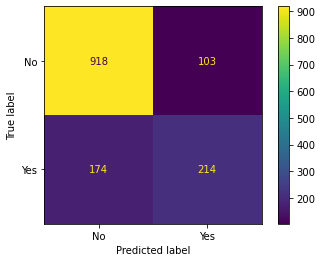

Cohen Kappa score: 0.4777661961616533

Classification Report:
              precision    recall  f1-score   support

         Yes       0.68      0.55      0.61       388
          No       0.84      0.90      0.87      1021

    accuracy                           0.80      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409



In [256]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=250)
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr', max_iter=500).fit(x_train, y_train)
from sklearn.metrics import accuracy_score
predictions = classification.predict(x_test)

print("y value counts:")
print(y.value_counts())
print(
)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, predictions))
confusion_matrix(y_test, predictions)
plot_confusion_matrix(classification, x_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP

from sklearn.metrics import cohen_kappa_score
print('Cohen Kappa score:',cohen_kappa_score(y_test, predictions))
print(
)

from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, predictions
                        , labels=['Yes','No']))

### 4. Managing imbalance in the dataset

- Check for the imbalance.
- Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
- Each time fit the model and see how the accuracy of the model is.

In [257]:
y.columns=["churn"]
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: churn, dtype: object

## Downsampling

In [300]:
data = pd.concat([X,y],axis=1)

category_0 = data[data['churn'] == "Yes"]
category_1 = data[data['churn'] == "No"]

# We pick a random sample of rows from of observations belonging to "category_0"
# in the same amount of observations belonging to "category_1"
category_1 = category_0.sample(len(category_0))
print(category_0.shape)
print(category_1.shape)

category_1=category_1.replace("Yes","No")

(1869, 34)
(1869, 34)


In [301]:
data_down = pd.concat([category_0, category_1], axis=0)
y_down=data_down["churn"]
X_down=data_down.drop("churn",axis=1)

y value counts:
No     1869
Yes    1869
Name: churn, dtype: int64

The accuracy of the model on test set is: 0.43 


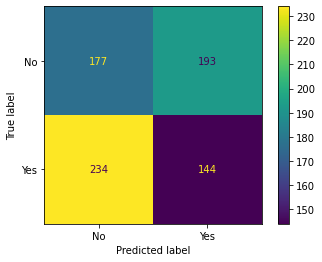

Cohen Kappa score: -0.140504484945438

Classification Report:
              precision    recall  f1-score   support

         Yes       0.43      0.38      0.40       378
          No       0.43      0.48      0.45       370

    accuracy                           0.43       748
   macro avg       0.43      0.43      0.43       748
weighted avg       0.43      0.43      0.43       748



In [302]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_down, y_down, test_size=0.2, random_state=250)
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr', max_iter=500).fit(x_train, y_train)
from sklearn.metrics import accuracy_score
predictions = classification.predict(x_test)

print("y value counts:")
print(y_down.value_counts())
print(
)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, predictions))
confusion_matrix(y_test, predictions)
plot_confusion_matrix(classification, x_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP

from sklearn.metrics import cohen_kappa_score
print('Cohen Kappa score:',cohen_kappa_score(y_test, predictions))
print(
)

from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, predictions
                        , labels=['Yes','No']))

# Upsampling

In [305]:
data = pd.concat([X,y],axis=1)

category_0 = data[data['churn'] == "Yes"]
category_1 = data[data['churn'] == "No"]

# We pick a random sample of rows from of observations belonging to "category_0"
# in the same amount of observations belonging to "category_1"
category_1 = category_1.sample(len(category_0))
category_1=category_1.replace("Yes","No")
print(category_0.shape)
print(category_1.shape)

data_up = pd.concat([category_0, category_1], axis=0)
y_up=data_up["churn"]
X_up=data_up.drop("churn",axis=1)


(1869, 34)
(1869, 34)


y value counts:
No     1869
Yes    1869
Name: churn, dtype: int64

The accuracy of the model on test set is: 0.80 


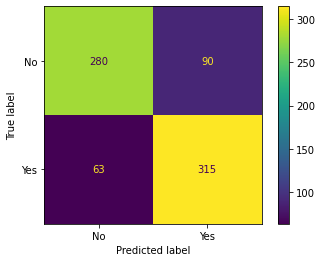

Cohen Kappa score: 0.5905461102524472

Classification Report:
              precision    recall  f1-score   support

         Yes       0.78      0.83      0.80       378
          No       0.82      0.76      0.79       370

    accuracy                           0.80       748
   macro avg       0.80      0.80      0.80       748
weighted avg       0.80      0.80      0.80       748



In [306]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.2, random_state=250)
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr', max_iter=500).fit(x_train, y_train)
from sklearn.metrics import accuracy_score
predictions = classification.predict(x_test)

print("y value counts:")
print(y_up.value_counts())
print(
)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, predictions))
confusion_matrix(y_test, predictions)
plot_confusion_matrix(classification, x_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP

from sklearn.metrics import cohen_kappa_score
print('Cohen Kappa score:',cohen_kappa_score(y_test, predictions))
print(
)

from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, predictions
                        , labels=['Yes','No']))

## SMOTE

In [258]:
from imblearn.over_sampling import SMOTE

# SMOTE only can handle numerical features. Therefore, if we want to use categoricals they 
# will need to be dummyfied. However, for sake of simplicity we will not include the categoricals.

data = pd.concat([X,y],axis=1)
smote = SMOTE()
y = data['churn']
X = data.drop(['churn'], axis=1)
X_sm, y_sm = smote.fit_sample(X, y)

unique, counts = np.unique(y_sm, return_counts=True)
print(np.asarray((unique, counts)).T)

[['No' 5174]
 ['Yes' 5174]]


y value counts:
No     5174
Yes    5174
Name: churn, dtype: int64

The accuracy of the model on test set is: 0.85 


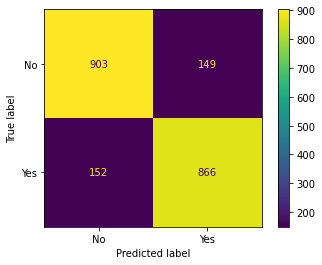

Cohen Kappa score: 0.7090864098385914

Classification Report:
              precision    recall  f1-score   support

         Yes       0.85      0.85      0.85      1018
          No       0.86      0.86      0.86      1052

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



In [264]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=250)
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr', max_iter=500).fit(x_train, y_train)
from sklearn.metrics import accuracy_score
predictions = classification.predict(x_test)

print("y value counts:")
print(y_sm.value_counts())
print(
)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, predictions))
confusion_matrix(y_test, predictions)
plot_confusion_matrix(classification, x_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP

from sklearn.metrics import cohen_kappa_score
print('Cohen Kappa score:',cohen_kappa_score(y_test, predictions))
print(
)

from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, predictions
                        , labels=['Yes','No']))

## Tomek's Links

In [261]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks('majority')
X_tl, y_tl = tl.fit_sample(X, y)

unique, counts = np.unique(y_tl, return_counts=True)
print(np.asarray((unique, counts)).T)

[['No' 4609]
 ['Yes' 1869]]


y value counts:
No     4609
Yes    1869
Name: churn, dtype: int64

The accuracy of the model on test set is: 0.82 


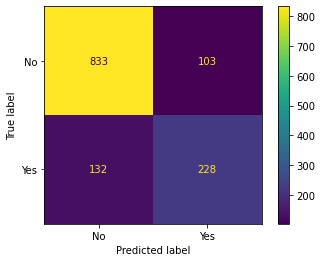

Cohen Kappa score: 0.5365907099035934

Classification Report:
              precision    recall  f1-score   support

         Yes       0.69      0.63      0.66       360
          No       0.86      0.89      0.88       936

    accuracy                           0.82      1296
   macro avg       0.78      0.76      0.77      1296
weighted avg       0.81      0.82      0.82      1296



In [263]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.2, random_state=250)
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr', max_iter=500).fit(x_train, y_train)
from sklearn.metrics import accuracy_score
predictions = classification.predict(x_test)

print("y value counts:")
print(y_tl.value_counts())
print(
)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, predictions))
confusion_matrix(y_test, predictions)
plot_confusion_matrix(classification, x_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP

from sklearn.metrics import cohen_kappa_score
print('Cohen Kappa score:',cohen_kappa_score(y_test, predictions))
print(
)

from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, predictions
                        , labels=['Yes','No']))